### Application of GPcounts on the single-cell RNA-seq data to identify gene-specific branching locations for individual genes. 

This notebook demonstrates how to build a GPcounts model and plot the posterior model fit and posterior branching times. We have used the single-cell RNA-seq of haematopoietic stem cells (HSCs) from mouse <a href="https://pubmed.ncbi.nlm.nih.gov/26627738/" target="_blank" text_decoration=none>(Paul et al., 2015)</a>. The data contain cells that are differentiated into myeloid and erythroid precursor cell types.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
# from IPython.display import display

### Data description

Slingshot algorithm <a href="https://pubmed.ncbi.nlm.nih.gov/29914354/" target="_blank">(Street et al., 2018)</a> has been used to get trajectory-specific pseudotimes as well as  assignment of cells to different branches. Slingshot infers two lineages for this dataset. The data were derived from the <a href="https://statomics.github.io/tradeSeq/articles/tradeSeq.html" target="_blank">tradeSeq vignette</a>.

The __geneExpression.csv__ file contains the expression profiles of HSCs from mouse.  

The __Slingshot.csv__ file contains lineage-specific cell assignments as well as pseudotimes.

In [2]:
data = pd.read_csv('../data/PaulData/geneExpression.csv', index_col=[0]).T
slingShot = pd.read_csv('../data/PaulData/Slingshot.csv', index_col=[0])

In [3]:
data.head()

,Acin1,Actb,Ak2,Alad,Alas1,Aldoa,Anapc5,Ankrd13a,Anp32b,Apoe,...,Ucp2,Uqcr10,Uqcrq,Vamp5,Vars,Vim,Ybx1,Ywhae,Zfpm1,rp9
W31105,1,2,0,0,0,0,0,1,0,1,...,1,1,0,0,0,1,1,1,0,2
W31106,3,27,1,0,9,11,3,4,1,2,...,1,3,2,1,0,3,11,2,0,1
W31107,2,52,4,4,0,2,5,3,6,1,...,6,3,3,1,9,0,14,3,7,3
W31108,4,50,4,1,18,14,6,3,4,0,...,4,3,5,3,2,7,15,0,0,2
W31109,6,55,6,4,0,6,7,7,7,0,...,8,5,6,3,5,0,14,2,6,5


In [4]:
slingShot.head()

,curve1,curve2,pseudotime
W31105,1.0,1.0,0.036348
W31106,1.0,0.0,0.840813
W31107,0.0,1.0,0.759424
W31108,1.0,0.0,0.997455
W31109,0.0,1.0,0.766015


Slingshot assigns a weight to each cell indicating the assignment of cells to different branches. We have used assignment probability 0.80 to determine the cells belong to a specific branch (1 or 2) .

In [5]:
cell_label = np.ones(slingShot.shape[0]) * 2
for i in range(0, slingShot.shape[0]):
    if slingShot.values[i, 0] > 0.8:
        cell_label[i] = 1

### Fit GPcounts model for branching

We have shown examples using both the Negative binomial and the Gaussian likelihood

### Negative bionomial likelihood

In [6]:
from GPcounts.GPcounts_Module import Fit_GPcounts
def Fit_GPcounts_for_branching(geneName, likelihood='Negative_binomial', bins_num=50, ns=5):
    X = slingShot[1::ns][['pseudotime']] 
    Y = data[1::ns][[geneName]].T
    gp_counts = Fit_GPcounts(X,Y)
    d = gp_counts.Infer_branching_location(cell_label[1::ns], bins_num=bins_num, lik_name=likelihood)
    del gp_counts
    return d
d = Fit_GPcounts_for_branching('Mpo', bins_num=25)

  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,True,(),float64,1.0
VGP.kernel.kern.lengthscales,Parameter,Softplus,,True,(),float64,1.0
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.11151168243144001, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.11151168243144001, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.11151168243144001, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.11151168243144001, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.11151168243144001, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.kern.variance,Parameter,Softplus,,False,(),float64,4.344037728243174
VGP.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.7470584555412823
VGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.0
VGP.likelihood.scale,Parameter,,,False,(),float64,1.0
VGP.q_mu,Parameter,,,True,"(532, 1)",float64,[[0....
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 532, 532)",float64,"[[[1., 0., 0...."


100%|██████████| 1/1 [00:05<00:00,  5.40s/it]


#### plot the posterior model fit and posterior branching times

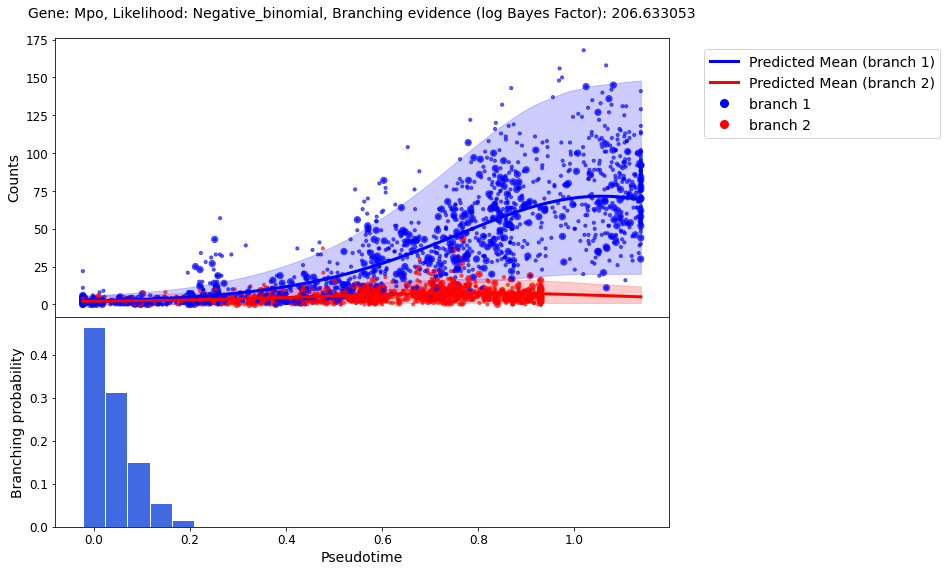

In [8]:
from helper import plotBranching, plotGene
fig, ax = plotBranching(d)
plotGene(ax[0], X=slingShot[['pseudotime']], Y=data[['Mpo']].T, label=cell_label, size=10, alpha=.6)

### Gaussian likelihood

In [9]:
geneName = 'Mpo'
d = Fit_GPcounts_for_branching(geneName, 'Gaussian', bins_num=25)

  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,True,(),float64,1
GPR.kernel.kern.lengthscales,Parameter,Softplus,,True,(),float64,1
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.2, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.11151168243144001, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.11151168243144001, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.11151168243144001, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.11151168243144001, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


  0%|          | 0/1 [00:00<?, ?it/s]

{'ls': 0.11151168243144001, 'var': 3.0, 'alpha': 5.0, 'km': 35.0}


name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kern.variance,Parameter,Softplus,,False,(),float64,3.8877
GPR.kernel.kern.lengthscales,Parameter,Softplus,,False,(),float64,0.638948
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


100%|██████████| 1/1 [00:01<00:00,  1.01s/it]


#### plot the posterior model fit and posterior branching times

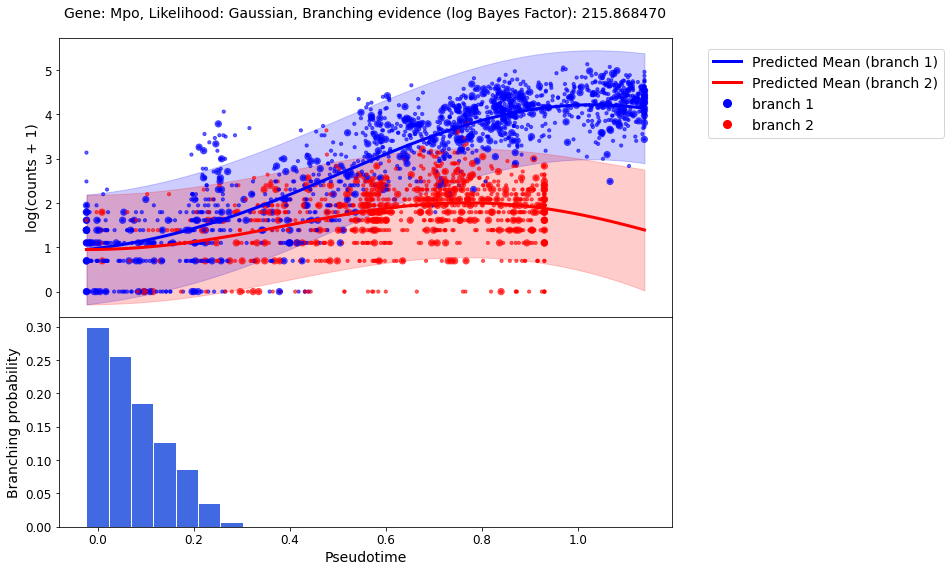

In [10]:
ig, ax = plotBranching(d)
plotGene(ax[0], X=slingShot[['pseudotime']], Y=np.log(data[[geneName]].T + 1), label=cell_label, size=10, alpha=.6)